In [2]:
import numpy as np, matplotlib.pyplot as plt

### Exercise 8.1 

 **低通滤波**
		

一个由一个电阻和一个电容器组成的简单电路:
        
<img src="lowpass.png">
这个电路的功能是低通滤波: 从左侧输入一个信号, 在右侧输出滤波之后的信号.
		
		
		
使用欧姆定律和电容器定律，并假设输出负载具有很高的阻抗, 所以流过的电流可以忽略, 可以写出如下电流方程组. 令$I$代表流过$R$且流入电容器的电流, $Q$代表电容器中的电荷. 那么:
		$$
		IR = V_\textrm{in} - V_\textrm{out}\,,\qquad
		Q = CV_\textrm{out}\,,\qquad
		I = {d Q\over d t}.
		$$
将第二个方程代入第三个方程, 然后将结果代入第一个方程, 得到
		 $V_\textrm{in} -
		V_\textrm{out} = RC ({d V_\textrm{out}/d t})$, 或者等价的
		$$
		{d V_\textrm{out}\over d t} = {1\over RC}
		\bigl( V_\textrm{in} - V_\textrm{out} \bigr).
		$$
		
		
 1. 写程序用4阶龙格-库塔法解出
$V_\textrm{out}(t)$. 输入信号是频率为1, 振幅为1的方波:
$$
			V_\textrm{in}(t) = \begin{cases}
			1  & \qquad\mbox{if $\lfloor 2t \rfloor$ is even,} \\
			-1 & \qquad\mbox{if $\lfloor 2t \rfloor$ is odd,}
			\end{cases}
$$
其中 $\lfloor x\rfloor$ 代表 $x$ 向下取整. 画出$t=0$到10的电路输出,  $RC=0.01$, $0.1$, 和1, 初始条件$V_\textrm{out}(0)=0$. 你需要确定在计算中使用$h$的值. 小的$h$可以使结果更精确, 但是程序运行时间比较长. 尝试使用不同的$h$值, 选择一个你认为合理的步长. 

2. 根据你画的图, 描述你看到的现象并解释电路的功能.
在大多数立体声和音乐播放器中都有一个和你写的程序类似的程序, 来产生一个低音控制的效果. 
在以前, 立体声的低音控制需要在扩音电路上外接一个真正的电子低通滤波器, 现在则只需要一个类似于你的程序的计算机处理器来模拟滤波器的行为. 	

In [3]:
def Vin(t):
    """定义输入方波信号"""
    V = np.zeros(t.size)
    for i in range(t.size):
        if int(t[i])%2==0: V[i] = 1
        else: V[i] = -1
    return V

def f(t,y,vin, RC): #定义待解微分方程
    return (vin-y)/RC

def rk4n(f,t,y0,vin,RC): #为解带参数问题重新定义4阶Runge-Kutta法
    """
    f: 被积分函数
    t: 时间节点
    y0: 初值, a list of initial values
    y: output results
    """
    n = t.size
    h = t[1]-t[0]
    y = np.zeros(n)
    y[0] = y0
    for i in range(1,n):
        k1 = h*f(t[i-1],y[i-1],vin[i-1],RC)
        k2 = h*f(t[i-1]+h/2, y[i-1]+k1/2,vin[i-1],RC)
        k3 = h*f(t[i-1]+h/2, y[i-1]+k2/2,vin[i-1],RC)
        k4 = h*f(t[i-1]+h, y[i-1]+k3/2,vin[i-1],RC)
        y[i] = y[i-1]+(k1+2*k2+2*k3+k4)/6
    return y

Text(0, 0.5, 'Vout')

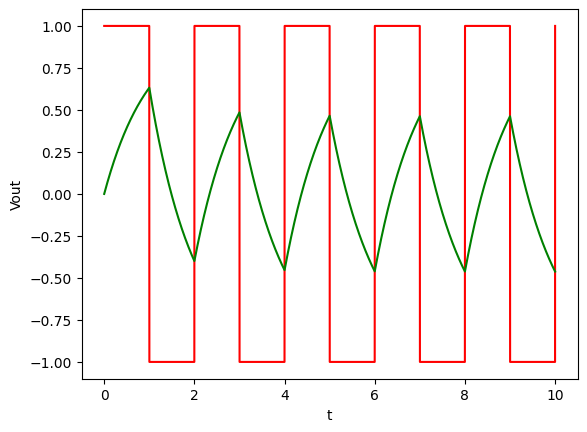

In [4]:
h = 0.001
t= np.arange(0,10+h,h)
#plt.plot(t,Vin(t))
y0 = 0
vin = Vin(t)
y = rk4n(f,t,y0,vin,RC=1)
plt.plot(t,vin,'r-')
plt.plot(t,y,'g')
plt.xlabel("t")
plt.ylabel("Vout")

### Exercise 8.2 

**Lotka--Volterra 方程组**
		
Lotka--Volterra方程是生物种群之间的捕食者-猎物的数学模型. 用两个变量
	 $x$ 和 $y$ 代表两个物种的种群大小, 传统的模型中分别被叫做“兔子” (猎物) 和“狐狸” (捕食者).  可以把$x$和$y$当作以千为单位的种群数量, 比如$x=2$代表有2000只兔子. 严格来说, $x$ 和$y$ 的允许值是0.001的倍数, 因为兔子和狐狸的数目只能是整数. 但是0.001相对来说是一个较小的量, 所以可以合理的将$x$和$y$当作连续实数, 只要它们不非常接近于0.
		
在Lotka--Volterra模型中, 兔子繁殖率正比于它们的数量, 被捕食率正比于兔子和狐狸的数量:
		$$
		{ d x\over d t} = \alpha x - \beta xy,
		$$
这里$\alpha$ 和 $\beta$ 是常数. 同时狐狸的繁殖率正比于它们捕获兔子的数量---因为它们需要食物来生长和繁殖---但是死亡率正比于它们本身的数量:
		$$
		{ d y\over d t} = \gamma xy - \delta y,
		$$
其中 $\gamma$ 和 $\delta$ 也是常数.
		
		
1. 用4阶龙格-库塔法解这个方程组, 取 $\alpha=1$, $\beta=\gamma=0.5$, 
$\delta=2$, 初始条件 $x=y=2$. 在一幅坐标轴上画出$x$和$y$随时间的变化, 时间从$t=0$到$t=30$.  (
提示: 注意这个微分方程组没有显式依赖于时间$t$, 在向量表示下, 方程右手边是函数$f(\vec{r})$, 不含$t$. 不过你可以定义Python函数\verb|f(r,t)|, 这样程序不用改变. 这虽然不是必须的, 但是可以避免困惑. 下面练习中的几个也缺少对时间的显式依赖.)

2. 以狐狸和兔子为例描述一下系统的行为.

In [22]:
def rk4(f,y0,t):
    """
    f: 被积分函数
    t: 时间节点
    y0: 初值, a list of initial values
    y: output results
    """
    m = len(y0)
    n = t.size
    h = t[1]-t[0]
    y = np.zeros((n,m))
    y[0,:] = y0
    for i in range(1,n):
        k1 = h*f(y[i-1,:], t[i-1])
        k2 = h*f(y[i-1,:]+k1/2, t[i-1]+h/2)
        k3 = h*f(y[i-1,:]+k2/2, t[i-1]+h/2)
        k4 = h*f(y[i-1,:]+k3/2, t[i-1]+h)
        y[i,:] = y[i-1,:]+(k1+2*k2+2*k3+k4)/6
    return y

In [24]:
def rk4_array(f,y0,t):
    """
    f: 被积分函数
    t: 时间节点
    y0: 初值, a list of initial values
    y: output results
    """
    m = len(y0)
    n = t.size
    h = t[1]-t[0]
    y = np.zeros((n,m))
    y[0,:] = y0
    for i in range(1,n):
        k1 = h*f(y[i-1,:], t[i-1])
        k2 = h*f(y[i-1,:]+k1/2, t[i-1]+h/2)
        k3 = h*f(y[i-1,:]+k2/2, t[i-1]+h/2)
        k4 = h*f(y[i-1,:]+k3/2, t[i-1]+h)
        y[i,:] = y[i-1,:]+(k1+2*k2+2*k3+k4)/6
    return y

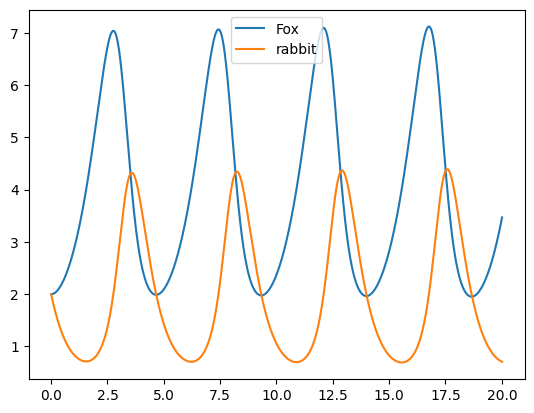

In [25]:
def f(y,t):
    return np.array([y[0]-0.5*y[0]*y[1], 0.5*y[0]*y[1]-2*y[1]])
y0 = [2.,2.]
h=0.01
t = np.arange(0,20+h,h)
y = rk4_array(f,y0,t)
plt.plot(t,y[:,0],label='Fox')
plt.plot(t,y[:,1],label='rabbit')
plt.legend()

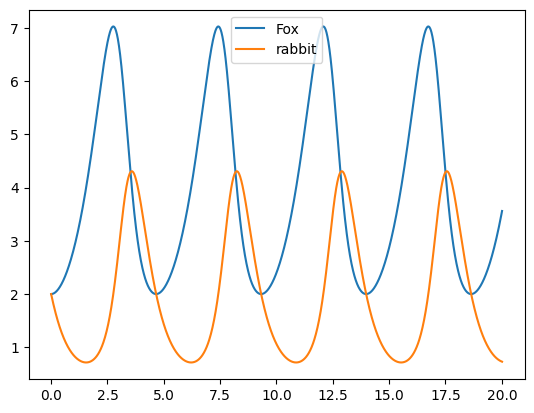

In [26]:
from scipy.integrate import odeint
def f(y,t):
    return np.array([y[0]-0.5*y[0]*y[1], 0.5*y[0]*y[1]-2*y[1]])
y0 = [2.,2.]
h=0.01
t = np.arange(0,20+h,h)
y = odeint(f,y0,t)
plt.plot(t,y[:,0],label='Fox')
plt.plot(t,y[:,1],label='rabbit')
plt.legend()

Text(0, 0.5, 'fox')

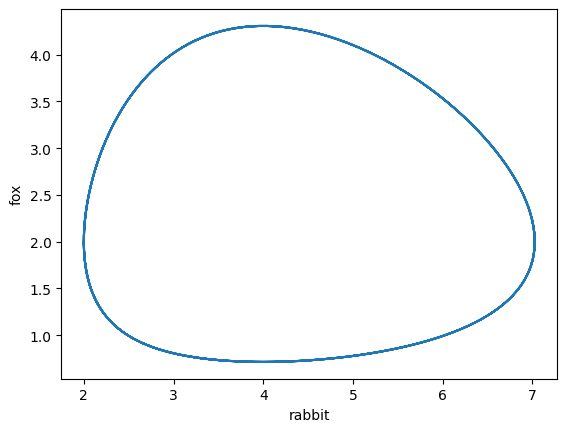

In [27]:
plt.plot(y[:,0],y[:,1])
plt.xlabel('rabbit')
plt.ylabel('fox')

### Exercise 8.3 

		
**洛伦兹方程组**
		
洛伦兹方程是物理学中最著名的微分方程组之一：		
$${ d x\over d t} = \sigma(y-x),\qquad
{ d y\over d t} = rx - y - xz,\qquad
{ d z\over d t} = xy - bz,$$
其中 $\sigma$, $r$, 和$b$ 是常数. 
		
这组方程是Edward Lorenz在1963年研究天气变化的简化模型时提出的. 
	
这组方程著名的原因是它们是**确定性混沌**的第一个无可争议的例子, 尽管方程没有随机性, 但是却出现了随机运动. 另外一个混沌的例子是单峰映像(logistic map).
		
1. 写程序解洛伦兹方程组, 取
$\sigma=10$, $r=28$, $b=\frac83$, $t$的范围从$t=0$ 到 $t=50$, 初始条件为$(x,y,z)=(0,1,0)$. 画出$y$和时间的关系图. 注意运动的不可预知性.  (提示: 如果你用前面的程序, 要小心一点. 这个问题有参数$r$和$b$, 是和前面的程序中的变量同名的---确保给变量新的变量名或者用不能名字的参数, 以避免导致程序错误.)

1. 修改程序画$z$ vs $x$图. 你会看到著名的“奇异吸引子”图像, 一幅蝶形图的侧面.

In [28]:
def f(y,t):
    return np.array([10*(y[1]-y[0]),
                    28*y[0]-y[1]-y[0]*y[2],
                     y[0]*y[1]-8*y[2]/3
                    ])
y0=[0,1,0]
h = 0.01
t = np.arange(0,50+h,h)
#y = rk4(f,y0,t)
y = odeint(f,y0,t)

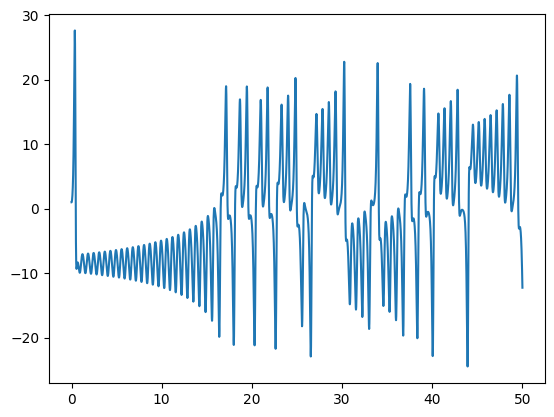

In [19]:
plt.plot(t,y[:,1])

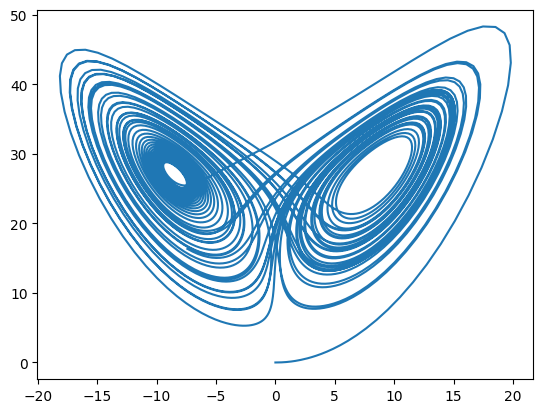

In [20]:
plt.plot(y[:,0],y[:,2])

 Exercise 8.4 

### 4.
基于例8.6的结果, 计算下面非线性摆的运动.
		
1. 写程序解两个一阶方程组方程(8.45)和(8.46), 使用4阶龙格库塔法, 单摆的长度为$10\,$cm. 用程序几个周期的角位移$\theta$, 初始位置的角度为$\theta=179^\circ$. 以$\theta$作为时间的函数作图.

1. 拓展你的程序, 做单摆运动的动画. 你的动画需要包括一个摆锤和一个单摆的悬垂线. (提示: 如果是3维动画, 可以用rate函数调解动画的速度. )
面对更大的挑战, 看一下练习8.15和398页, 写程序计算双摆的混沌运动.
		

Exercise 8.5 

### **驱动摆**
		
如习题4中的

如果单摆如果受到一个小的水平振荡力, 则运动方程变为
$$
		{ d^2\theta\over d t^2} = - {g\over\ell}\sin\theta
		+ C \cos\theta \sin\Omega t,
$$
其中 $C$ 和 $\Omega$ 是常数.
		
1. 写程序解出$\theta$, $\theta$是时间的函数, $\ell=10\,$cm, $C=2\,\mathrm{s}^{-2}$, 
$\Omega=5\,\mathrm{s}^{-1}$. 画 $\theta$ 随时间的变化图,  $t=0$ 到 $t=100\,$s.  初始值为$\theta=0$ 和 $ d\theta/ d t=0$.


2. 保持$C$不变，改变$\Omega$, 找到与驱动力共振的单摆周期使得摆动幅度最大. 对这种情况画图.
		

解：首先将二阶常微分方程化为一阶常微分方程组
\begin{cases}
\frac{d\theta}{dt}&=&y\\
\frac{dy}{dt}&=&- {g\over\ell}\sin\theta
		+ C \cos\theta \sin\Omega t,
\end{cases}

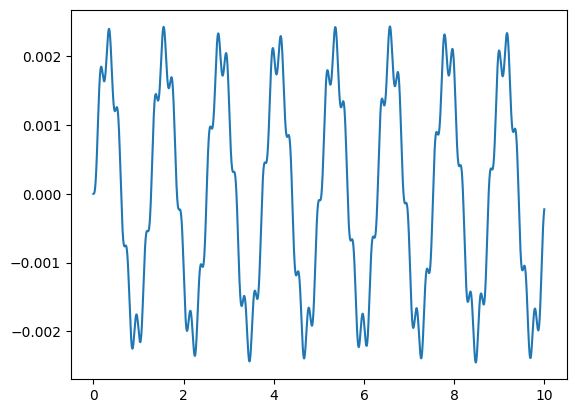

In [29]:
def rk4(f,t,y0):
    """
    f: 被积分函数
    t: 时间节点
    y0: 初值, a list of initial values
    y: output results
    """
    m = len(y0)
    n = t.size
    h = t[1]-t[0]
    y = np.zeros((n,m))
    y[0,:] = y0
    for i in range(1,n):
        k1 = h*f(t[i-1],y[i-1,:])
        k2 = h*f(t[i-1]+h/2, y[i-1,:]+k1/2)
        k3 = h*f(t[i-1]+h/2, y[i-1,:]+k2/2)
        k4 = h*f(t[i-1]+h, y[i-1,:]+k3/2)
        y[i,:] = y[i-1,:]+(k1+2*k2+2*k3+k4)/6
    return y
def f(t,y):
    g,l,C,Omega=9.8,0.01,2,5
    return np.array([y[1],-g/l*np.sin(y[0])+C*np.cos(y[0])*np.sin(Omega*t)])
t=np.linspace(0,10,100001)
y0=[0.,0.]
results = rk4(f,t,y0)
plt.plot(t,results[:,0])

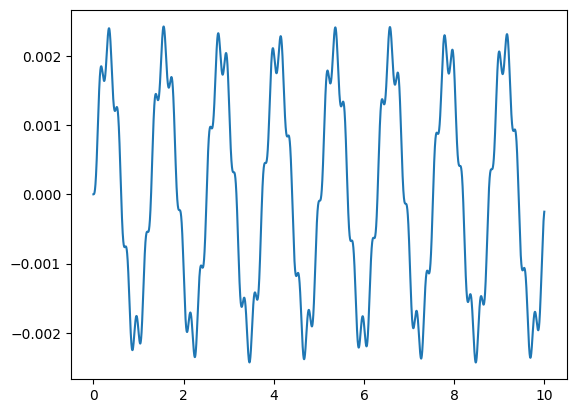

In [30]:
def f(y,t):
    g,l,C,Omega=9.8,0.01,2,5
    return np.array([y[1],-g/l*np.sin(y[0])+C*np.cos(y[0])*np.sin(Omega*t)])
    
y0 = [0,0]
t=np.linspace(0,10,10001)
y = odeint(f,y0,t)
plt.plot(t,y[:,0])

 Exercise 8.6 

**简谐和非简谐振子**
		
很多物理问题中都存在简谐振荡, 力学，电磁学和致密物质物理学等. 考虑标准的简谐振荡方程
$${ d^2 x\over d t^2} = -\omega^2 x.$$	
1. 用前面描述的方法将二阶常微分方程转化成一阶方程组. 写程序解这个方程组, 取$\omega=1$, 时间变化从$t=0$到$t=50$.  二阶微分方程需要两个初始条件, 一个是初值一个是导数初值. 在本题中的初条件是$x=1$ 和 $ d
x/ d t = 0$. 对$x$随时间的变化作图.

2. 增加振荡的幅度, 设初始值$x$更大, 比如$x=2$, 请说明振荡周期几乎不变.
			
3. 修改程序, 解由下列方程描述的非简谐振动
$${ d^2 x\over d t^2} = -\omega^2 x^3.
$$
仍然设$\omega=1$, 初始条件是 $x=1$, $ d x/ d t=0$, 画图描述振子的运动.  改变振幅, 你会发现振幅大的时候振荡更快 (你也可以尝试更小的振幅, 振荡速度会变慢.)

4. 修改程序, 不要画$x$随$t$的变化, 画$ d x/ d t$ 随$x$的变化, 即, 振荡速度和位移之间的关系. 这种图被称为相图.

[Text(0.5, 0, '$t$'), Text(0, 0.5, '$x$')]

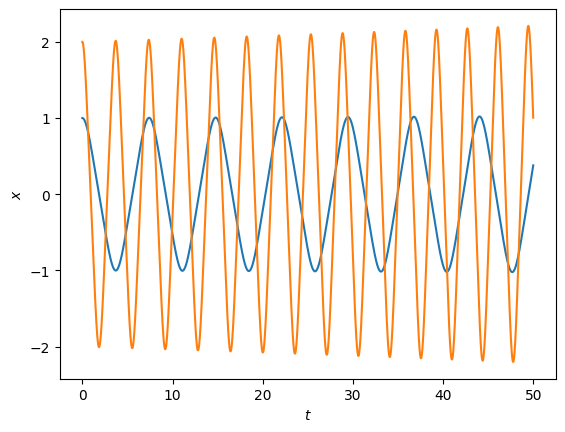

In [31]:
def rk4(f,t,y0):
    """
    f: 被积分函数
    t: 时间节点
    y0: 初值, a list of initial values
    y: output results
    """
    m = len(y0)
    n = t.size
    h = t[1]-t[0]
    y = np.zeros((n,m))
    y[0,:] = y0
    for i in range(1,n):
        k1 = h*f(t[i-1],y[i-1,:])
        k2 = h*f(t[i-1]+h/2, y[i-1,:]+k1/2)
        k3 = h*f(t[i-1]+h/2, y[i-1,:]+k2/2)
        k4 = h*f(t[i-1]+h, y[i-1,:]+k3/2)
        y[i,:] = y[i-1,:]+(k1+2*k2+2*k3+k4)/6
    return y
def f(t,y):
    omega=1
    return np.array([y[1],-omega**2*y[0]**3])
dt=0.01
t=np.arange(0,50+dt,dt)
y0=[1,0]
res = rk4(f,t,y0)
plt.plot(t,res[:,0])
y0=[2,0]
res = rk4(f,t,y0)
plt.plot(t,res[:,0])
ax = plt.gca()
ax.set(xlabel='$t$', ylabel='$x$')

[Text(0.5, 0, '$x$'), Text(0, 0.5, '$y$')]

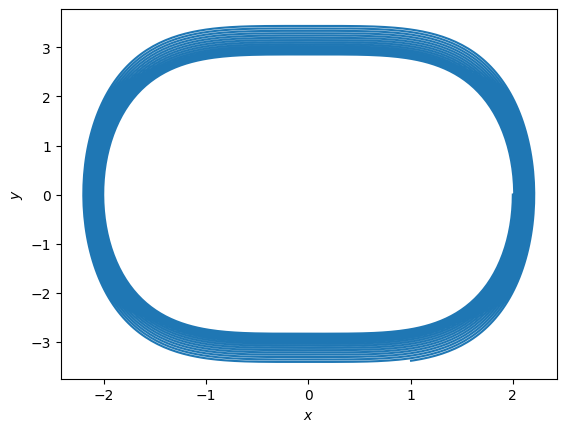

In [32]:
plt.plot(res[:,0],res[:,1])
ax = plt.gca()
ax.set(xlabel='$x$', ylabel='$y$')

In [33]:
from scipy.integrate import odeint
def f(y,t):
    omega=1
    return np.array([y[1],-omega**2*y[0]])
t=np.arange(0,50+dt,dt)
y0=[1,0]
r = odeint(f,y0,t)

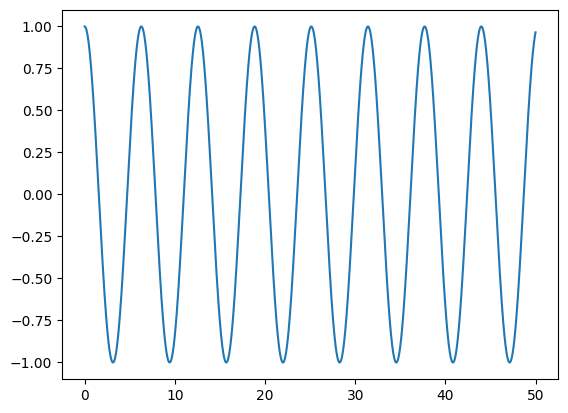

In [34]:
plt.plot(t,r[:,0])

**van der Pol 振子** 

van der Pol振子出现在电路和激光物理中, 由下面的方程描述
$${ d^2 x\over d t^2} - \mu (1-x^2) { d x\over d t} + \omega^2 x = 0.
$$
选择一种解常微分方程的方法, 在$t=(0,20)$上解这个方程, 画van der Pol振子的相空间图, 取 $\omega=1$,
$\mu=1$, 初始条件为 $x=1$ 和 $ d x/ d t=0$.  尝试取
$\mu=2$ 和 $\mu=4$ (保持$\omega=1$).  使时间间隔$h$足够小以确保获得一个平滑准确得相图.
		
	

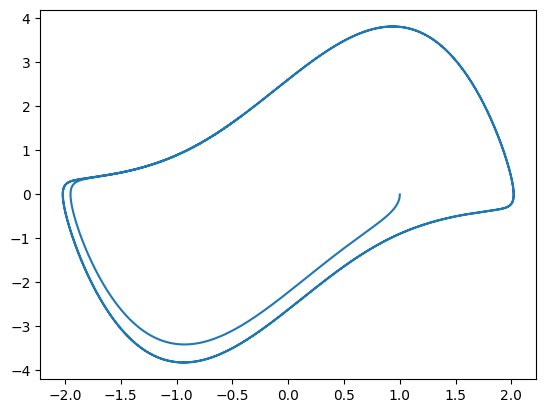

In [35]:
def f(t,y):
    omega=1
    u=2
    return np.array([y[1],-omega**2*y[0]+u*(1-y[0]**2)*y[1]])
dt=0.001
t=np.arange(0,20+dt,dt)
y0=[1,0]
res = rk4(f,t,y0)
plt.plot(res[:,0],res[:,1])

### Exercise 8.7 

### **空气阻力下的炮弹轨迹**
		
许多基础力学问题研究物体在空气中运动或者飞行的轨迹, 但是为了使问题可解, 常常忽略空气阻力或者摩擦力. 如果是用计算机, 则不需要求方程组的解析解.
		
例如, 

一个地面上的加农炮射出炮弹所受的空气阻力与运动方向相反, 量级为
$$F = \frac{1}{2} \pi R^2\rho C v^2,
$$
其中$R$ 是炮弹半径, $\rho$是空气密度, $v$ 是速度, $C$ 被称为"拖曳"系数(与运动物体形状有关的参数, 本题中是球体).
		
1. 由牛顿第二定律出发, $F=ma$, 炮弹在二维空间$(x,y)$的运动方程是
$$\ddot{x} = - {\pi R^2\rho C\over2m}\,
			\dot{x}\sqrt{\dot{x}^2+\dot{y}^2},
			$$
   $$
			 \ddot{y} =  - g - {\pi R^2\rho C\over2m}\,
			\dot{y}\sqrt{\dot{x}^2+\dot{y}^2},
$$
这里$m$是炮弹的质量, $g$ 是重力加速度, $\dot{x}$ and $ \ddot{x}$是$x$ 
的关于时间的一阶和二阶导数.

3. 将两个二阶方程转化成4个1阶方程, 解质量为$1\,$kg, 半径为$8\,$cm 的炮弹的运动方程. 炮弹是以与地平线夹角$30^\circ$, 初始速度为$100\,\mathrm{m~s}^{-1}$发射的. 空气密度$\rho=1.22\,\textrm{kg}\,\textrm{m}^{-3}$ 球体的拖曳系数为 $C=0.47$. 画炮弹的轨迹
(即, $y$随$x$变化的图像).

Text(0, 0.5, 'y')

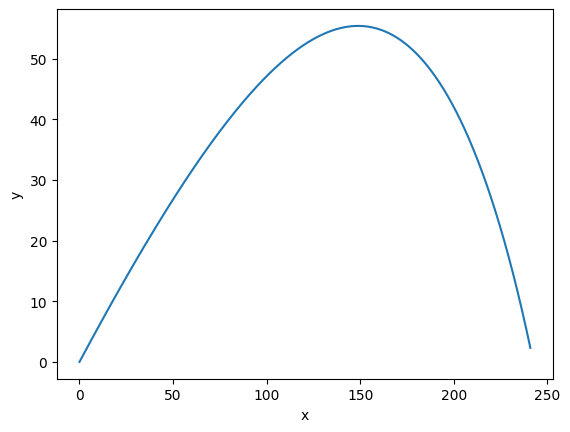

In [36]:
from scipy.integrate import odeint
def f(y,t,m=1):
    g=9.8;rho=1.22;C=0.47;R=8e-2
    c=np.pi*R**2*rho*C/2/m
    return np.array([y[1],
                     -c*y[1]*np.sqrt(y[1]**2+y[3]**2),
                     y[3],
                     -g-c*y[3]*np.sqrt(y[1]**2+y[3]**2)])
dt=0.01
t = np.arange(0,6.5+dt,dt)
v0=100
y0=[0,v0*np.cos(np.pi/6),0,v0*np.sin(np.pi/6)]
res = odeint(f,y0,t)

plt.plot(res[:,0],res[:,2])
plt.xlabel('x')
plt.ylabel('y')

3. 当忽略空气阻力的时候, 炮弹飞行的距离与质量无关. 但是实际上质量肯定会影响飞行距离. 用程序估计上面炮弹的飞行距离(水平方向), 检查炮弹的轻重会不会影响飞行距离. 你可以画一系列不同质量炮弹的轨迹, 或者画飞行距离和质量的关系图. 简单描述你的发现. 

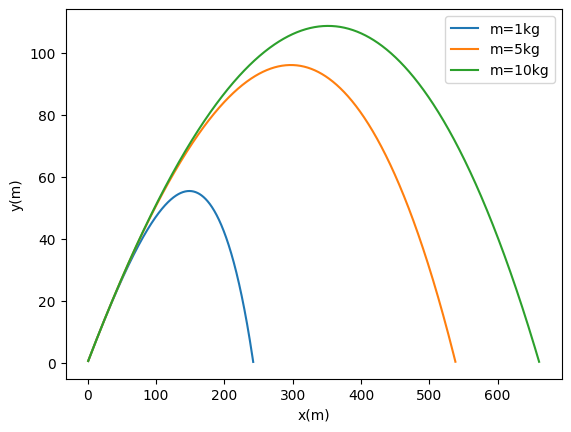

In [37]:
dt=0.01
t = np.arange(0,10+dt,dt)
v0=100
y0=[0,v0*np.cos(np.pi/6),0,v0*np.sin(np.pi/6)]
for m in [1,5,10]:
    res = odeint(f,y0,t,args=(m,))
    x = res[:,0]
    y = res[:,2]
    x = x[np.where(y>0)]
    y = y[np.where(y>0)]
    plt.plot(x,y,label=f'm={m}kg')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.legend()

### Exercise 8.8 

### **太空垃圾**
		
被路过的太空飞船抛弃的一个重铁棒和一个滚珠轴承在失重的情况下漂浮在太空中, 滚珠轴承在万有引力作用下绕着金属棒旋转:

<img src="rod.png" width=200>

为简化起见, 我们假设金属棒的粗细可以忽略, 重量足够大所以它自己的运动可以忽略不计, 滚珠轴承在垂直于棒体且位于棒体中间位置处的平面上绕金属棒运动.
		
1. 将金属棒当作重量为$M$长度为$L$的线段, 滚珠轴承看作是质量为$m$的质点, 则滚珠轴承受到的来自棒体的向心力由下式给出 
$$F = {GMm\over L} \sqrt{x^2+y^2}
			\int_{-L/2}^{L/2} { d z\over(x^2+y^2+z^2)^{3/2}}\,,
$$
其中$G$是万有引力常数, $x$ 和 $y$ 是轴承在垂直于棒体的平面上的坐标.  闭合回路的积分可以给出
$$F = {GMm\over\sqrt{(x^2+y^2)(x^2+y^2+L^2/4)}}.
$$
因此在$xy$平面上点$x,y$的轴承的运动方程是
$${ d^2 x\over d t^2} = - GM {x\over r^2\sqrt{r^2+L^2/4}},$$
$$
{ d^2 y\over d t^2} = - GM {y\over r^2\sqrt{r^2+L^2/4}},
$$
其中 $r=\sqrt{x^2+y^2}$.

3. 将这两个二阶方程转换成4个一阶方程. 选择单位使得$G=1$, 写程序解方程, 设 $M=10$, $L=2$, 初始位置为
$(x,y)=(1,0)$, $y$方向的速度为$+1$. 计算时间从$t=0$到$20$的运动轨道并画图, 即$y$随$x$的变化图. 你会发现轴承并不是像行星那样按圆形或者椭圆形的轨道运动的, 而是一个进动轨道, 进动产生的原因是轴承所受的是吸引力不是与$1/r^2$成反比的力, 这与行星绕太阳运动不同. 

Text(0, 0.5, 'y')

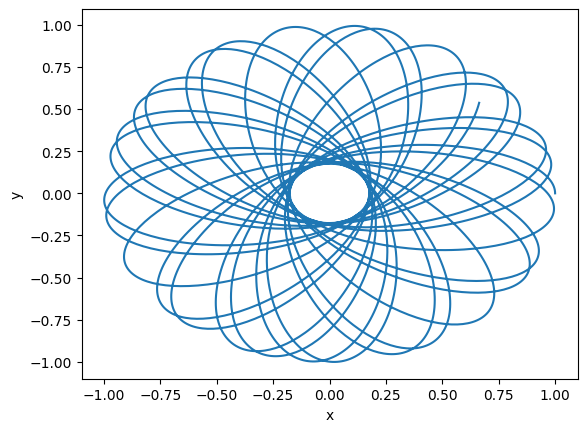

In [38]:
from scipy.integrate import odeint

def f(y,t,G=1,M=10,L=2):
    r2 = y[0]**2+y[2]**2
    dev = -G*M/r2/np.sqrt(r2+L**2/4)
    return np.array([y[1],y[0]*dev,y[3],y[2]*dev])

dt = 0.01
t = np.arange(0,30+dt,dt)
y0=[1,0,0,1]
res = odeint(f,y0,t)

plt.plot(res[:,0],res[:,2])
plt.xlabel('x')
plt.ylabel('y')

### Exercise 8.9 

### **一维系统中的振动**

在例6.2中, 我们研究了一个含有$N$个同样质量的物体(不考虑重力)被同样性质的弹簧连接的系统如下:

<img src="springs.png" widht=300>

质点的水平位移$x_i$, $i=1\ldots N$ 满足运动方程组
\begin{align*}
		m { d^2\xi_1\over d t^2} &= k(\xi_2-\xi_1) + F_1,\\
		m { d^2\xi_i\over d t^2} &= k(\xi_{i+1}-\xi_i) + k(\xi_{i-1}-\xi_i) + F_i\,,
		\\
		m { d^2\xi_N\over d t^2} &= k(\xi_{N-1}-\xi_N) + F_N.
\end{align*}
这里$m$代表质量, $k$ 弹簧弹力系数, $F_i$作用在质点$i$上的外力. 在例6.2中我们用矩阵方法解了这个方程组. 这里我们来直接解.
		
1. 写程序用四阶龙格库塔法解这个方程组, 取
$m=1$, $k=6$, 除了$F_1 =
\cos\omega t$, $\omega=2$, 所有驱动力为0. 在一幅图中画所有$x_i$随时间的变化图,  时间从$t=0$
到 $t=20$.  让你的程序可以针对$N$是一般值得情况, 用$N=5$来做实验是一个合理的选择.
			
首先你需要将$N$个2阶方程转换成$2N$个1阶方程. 然后将所有因变量组成一个大的向量$\vec{r}$, 对$\vec{r}$可以应用龙格库塔法. 

2. 写程序做所有质点的运动的动画, 在计算机屏幕上用球来代表每个质点. 使用
\verb|rate| 函数让动画更流畅.

In [ ]:
def f(t,y,N):
    funcs = np.zeros(2*N)
    

### Exercise 8.10 

### **彗星轨道**
		
很多彗星在高椭率的轨道上绕太阳运动. 它们大部分时间处于太阳系远端, 运动速度很慢, 但偶尔它们的轨道会靠近太阳, 在较短的时间中它们的运动速度很快:
<img src="orbit.png" width=300>        
 这是一个采样自适应步长算法的经典例子, 因为彗星在很长时间内运动速度很慢, 时间步长可以比较长, 程序运行速度较快, 但是短时间内在靠近太阳的时候运动速度很快, 需要时间步长较小.
		
可以很直接的导出彗星运动的微分方程. 太阳质量为$M$位于原点, 彗星质量为$m$, 位置向量$\vec{r}$, 它们之间的作用力是$GMm/r^2$, 方向是$-\vec{r}/r$ (即, 朝向太阳), 由牛顿第二定律
$$
		m { d^2\vec{r}\over d t^2} = -\biggl({GMm\over r^2}\biggr)\,{\vec{r}\over r}.
$$
消掉 $m$, 查看$x$方向的分量
$$
		{ d^2 x\over d t^2} = -GM {x\over r^3}\,,
$$
另外两个方向与此类似.  因为彗星在一个平面上运动, 设为$xy$平面, 所以可以忽略$z$方向的运动. 需要解两个二阶微分方程:
$$
		{ d^2 x\over d t^2} = -GM {x\over r^3}\,, \qquad
		{ d^2 y\over d t^2} = -GM {y\over r^3}\,,
$$
其中 $r=\sqrt{x^2+y^2}$.
		
		
1. 将二阶微分方程转化为一阶微分方程.

2. 用固定步长的四阶龙格库塔法解微分方程. 你需要自己查一下同样质量和万有引力常数$G$. 初始条件设彗星的坐标为 $x=40$~亿公里, $y=0$ (大约在海王星外围附近), 初始速度为$v_x=0$, $v_y = 500\,\mathrm{m\,s}^{-1}$.  画出彗星运动轨道 (i.e., $y$随$x$的变化).
			
            
   选择一个固定的步长使得你至少计算两个轨道周期. 因为轨道是周期性的, 比较精确的计算结果会显示第二个轨道和第一个基本重合. 如果没有, 你需要减小步长. 简单描述你的发现. 你用到步长是什么? 在你模拟的过程中观察到了什么? 计算需要多次时间?

3. 复制你的代码, 修改代码让它变成变步长算法. 设置计算精度为
$\delta=1$公里每年, 再次画轨迹.  描述计算速度, 精度和计算步长的变化.

4. 修改程序用点来表示彗星在每一步龙哥库塔法计算的位置. 你会发现在离太阳近的时候步长小, 远的时候步长长.
		
		
类似的计算可以拓展到更多天体. 可以包括行星, 月亮, 小行星等. 这样复杂的系统是无法解析计算的, 但是微分方程的数值解可以让我们假设整个太阳系天体的运动.
	

### Exercise 8.11 

写程序解微分方程
$$
		{ d^2 x\over d t^2} - \biggl( { d x\over d t} \biggr)^2 + x + 5 = 0
$$
使用跳跃法. 时间变化从$t=0$ 到 $t=50$, 步长为
$h=0.001$, 初始条件为$x=1$ 和 $ d x/ d t = 0$. 画图展示$x$随时间$t$的变化.
	

### Exercise 8.12 

### **地球轨道**
		
用Verlet方法计算地球绕日运动轨道. 在位移为 $\vec{r} = (x,y)$ 出的行星的运动方程的向量形式是 
$$
		{ d^2\vec{r}\over d t^2} = -GM {\vec{r}\over r^3}\,,
$$
其中 $G=6.6738\times10^{-11}\,\mathrm{m^3\,kg^{-1}\,s^{-2}}$ 是万有引力常数, $M=1.9891\times10^{30}\,$kg 是太阳质量.
		
地球轨道不是圆形的, 它有时离太阳进, 有时离太阳远.  当地球处于离太阳最近的点, 即近日点时, 它沿切线方向运动(即,~垂直于太阳和地球的连线), 距离太阳 $1.4710\times10^{11}\,$m, 线速度为 
$3.0287\times10^4\,\mathrm{m\,s^{-1}}$.
		
1. 写程序用Verlet方法计算地球轨道, 解方程
 Eqs. (8.77) and (8.78), 时间步长$h=1$小时. 画地球轨道, 展示几个完整周期的变化, 轨道将稍微但是可以看出来偏离圆形轨道.

2. 地球的引力势能是$-GMm/r$, 其中
$m=5.9722\times10^{24}\,$kg 是地球质量, 她的动能仍然是a $\frac{1}{2} mv^2$. 修改程序在每一步计算这些量以及它们的和(总能量), 在一幅坐标轴中画出这三个量随时间的变化. 你会发现在地球运动的时候动能和势能发生变化, 但是总能量守恒. 

3. 现在只画总能量的变化, 此时可以看到总能量有轻微变化. 因为使用了 Verlet方法. 然而, 长期来看, 在每个轨道结束的时候能量就又回到了初始值. 

### Exercise 8.13 

 **行星轨道**
		
这个练习要求用Bulirsch--Stoer方法计算两个行星得轨道. 这个方法能够给出比Verlet更准确的结果.
		
在轨道平面内$x,y$坐标的行星的运动方程和前面的轨道方程一样:
$$
		{ d^2 x\over d t^2} = -GM {x\over r^3}\,, \qquad
		{ d^2 y\over d t^2} = -GM {y\over r^3}\,,
$$
其中 $G=6.6738\times10^{-11}\,\mathrm{m^3\,kg^{-1}\,s^{-2}}$ 是牛顿引力常数, $M=1.9891\times10^{30}\,$kg 是太阳质量,
$r=\sqrt{x^2+y^2}$.
		
首先用这个方法解地球轨道, 解的精度更高. 地球轨道不是正圆, 而是微椭.  当地球处于离太阳最近的点, 即近日点时, 它沿切线方向运动(即,~垂直于太阳和地球的连线), 距离太阳 $1.4710\times10^{11}\,$m, 线速度为 
$3.0287\times10^4\,\mathrm{m\,s^{-1}}$.
		
1. 写程序用Bulirsch--Stoer方法计算地球轨道, 计算精度达到$1\,$km 每年. 将轨道分成步长为$H=1$周的格点, 然后计算每个格点上的解, 采用修正的中点/理查森外推方法, 至少计算一个轨道周期. 

2. 修改程序计算矮行星冥王星的轨道. 冥王星近日点距太阳的距离为
$4.4368\times10^{12}\,$m, 此时它的线速度为$6.1218\times10^3\,\mathrm{ms^{-1}}$.  选择合适的步长$H$, 是计算的时间在合理范围, 精度为$1\,$km 每年.
			
你会发现冥王星的轨道明显椭率更高, 比地球轨道高很多. 冥王星是一个库伯(Kuiper)带天体, 类似于彗星, 而不像行星, 这类天体一般拥有高椭率的轨道.

### Exercise 8.14 

### **量子振荡**
		
考虑1维定态薛定谔方程处于谐波(如抛物型)势阱$V(x)=V_0 x^2/a^2$中, 这里$V_0$ 和$a$ 是常数.
		
1. 写出这个问题的薛定谔方程, 并将二阶微分方程转化成2个一阶微分方程. 写程序找出基态和前两个激发态的能量,  $m$是电子质量, $V_0=50\,$eV,  $a=10^{-11}\,$m.  注意理论上波函数可以达到$x=\pm\infty$,
但是你可以用较大的有限间隔获得一个比较好的解. 试使用$x=-10a$ 到 $+10a$, 波函数在两个边界上的值$\psi=0$.  (实际上, 你在一个由无法穿透的盒子中放置简谐振子.) 波函数是实数, 所以不需要使用复数变量, 你可以使用均匀分布的节点, 不需要使用自适应方法.
			
量子简谐振子的能级据说是均匀分布的. 在你的答案和精度的条件下检查这个是不是正确的.  (提示: 基态的能量在 100 到 $200\,$eV之间.)

2. 现在修改程序计算3个非简谐振子的能级,  $V(x) = V_0 x^4/a^4$, 参数值不变.

3. 修改程序计算非简谐振子在三个能态的归一化波函数, 并将它们画在一个坐标轴内, $x$取一个合理的范围, 比如$x=-5a$ 到 $x=5a$.
为对波函数进行归一化, 你需要计算积分
$\int_{-\infty}^\infty |\psi(x)|^2 d x$, 然后缩放$\psi$以使得每个波函数下面的面积是1. 梯形积分和Simpson积分都可以给出合理的积分结果. 需要注意的是, 在波函数的数组中你会发现几个很大的数值. 这些数值从哪里来? 是真是假? 
			
一个解决这个问题的办法是利用波函数关于中点的对称性, 只计算波函数左半部分的积分, 然后结果乘2. 这很好的避免了大的值.

 **有限深势阱的薛定谔方程**
		
一个粒子被束缚在如下势阱中
$$V(x)=\frac{\hbar^2}{2m}\alpha^2\lambda(\lambda-1)\left[\frac{1}{2}-\frac{1}{\cosh^2(\alpha x)}\right], $$
这里$\alpha,\lambda$是给定参数. 这个势阱对应的能量本征值是
$$E_n=\frac{\hbar^2}{2m}\alpha^2\left[\frac{\lambda(\lambda-1)}{2}-(\lambda-1-n)^2\right] $$
$n=0,1,2,\cdots$. 我们在$[-10,10]$区间上求这个问题的数值解, 区间均匀节点501个. 此问题中取$\alpha=1,\lambda=4$为例来解这个方程, 并取$\hbar=m=1$.

### Exercise 8.15 

### **双摆**
		
如果你完成了习题8.4, 你将有一个计算非线性单摆的运动程序. 虽然是非线性的, 但是非线性单摆仍然是规则的周期性运动. 与之相反的, 

双摆的运动是混沌和不可预知的. 双摆由一个单摆和一个连接在单摆末端的另外一个单摆构成. 为简化问题, 忽略摩擦， 假设两个摆的摆锤质量$m$相同, 摆臂长度相同$\ell$且质量可以忽略. 双摆图像如下:

<img src="double.png">

 任意时刻的摆臂位置由两个角$\theta_1$ 和$\theta_2$唯一确定. 角度的变化方程可以从拉格朗日公式导出如下.
		
从pivot点测量的两个摆锤的高度是
$$
		h_1 = -\ell\cos\theta_1, \qquad
		h_2 = -\ell(\cos\theta_1+\cos\theta_2),
$$
所以系统的势能是
$$
		V = mgh_1 + mgh_2 = -mg\ell(2\cos\theta_1 + \cos\theta_2),
$$
其中 $g$ 是重力加速度.
两个摆锤的(线)速度由下式给出
$$
		v_1 = \ell\dot\theta_1, \qquad
		v_2^2 = \ell^2 \bigl[ \dot\theta_1^2 + \dot\theta_2^2
		+ 2 \dot\theta_1\dot\theta_2 \cos(\theta_1-\theta_2) \bigr],
$$
其中 $\dot\theta$ 代表 $\theta$相当于时间$t$的导数.  (如果你不明白第二个速度方程是怎么来的, 最好自己推导一下.)  现在总能量是
$$
		T = \frac{1}{2} m v_1^2 + \frac{1}{2} m v_2^2
		= m\ell^2 \bigl[ \dot\theta_1^2 + \frac{1}{2} \dot\theta_2^2
		+ \dot\theta_1\dot\theta_2 \cos(\theta_1-\theta_2) \bigr],
$$
系统的拉格朗日方程是
$$
		\mathcal{L} = T - V
		= m\ell^2 \bigl[ \dot\theta_1^2 + \frac{1}{2}\dot\theta_2^2
		+ \dot{\theta_1}\dot{\theta_2} \cos(\theta_1-\theta_2) \bigr]
		+ mg\ell(2\cos\theta_1 + \cos\theta_2).
$$
然后由欧拉-拉格朗日方程给出运动方程
$$
		{ d\over d t} \biggl({\partial\mathcal{L}\over\partial\dot\theta_1} \biggr)
		= {\partial\mathcal{L}\over\partial\theta_1}, \qquad
		{ d\over d t} \biggl({\partial\mathcal{L}\over\partial\dot\theta_2} \biggr)
		= {\partial\mathcal{L}\over\partial\theta_2},
$$
		在本例中给出
\begin{align*}
		2 \ddot\theta_1 +  \ddot\theta_2 \cos(\theta_1-\theta_2)
		&+ \dot\theta_2^2 \sin(\theta_1-\theta_2) + 2{g\over\ell} \sin\theta_1 = 0,
		\\
		 \ddot\theta_2 +  \ddot\theta_1 \cos(\theta_1-\theta_2)
		&- \dot\theta_1^2 \sin(\theta_1-\theta_2) + {g\over\ell} \sin\theta_2 = 0,
\end{align*}
质量$m$被消去.
		
这是二阶运动方程组, 但是可以把它们转成一阶, 定义两个新变量,
$\omega_1$和$\omega_2$, 这样:
$$
		\dot\theta_1 = \omega_1,\qquad \dot\theta_2 = \omega_2.
$$
引入这个变量, 我们的运动方程化为
\begin{align*}
		2\dot\omega_1 + \dot\omega_2 \cos(\theta_1-\theta_2)
		&+ \omega_2^2 \sin(\theta_1-\theta_2) + 2{g\over\ell} \sin\theta_1 = 0,
		\\
		\dot\omega_2 + \dot\omega_1 \cos(\theta_1-\theta_2)
		&- \omega_1^2 \sin(\theta_1-\theta_2) + {g\over\ell} \sin\theta_2 = 0.
\end{align*}
最好整理成标准形式, 等式左边只有一个一阶导数项
\begin{align*}
		\dot\omega_1 &= - {\omega_1^2\sin(2\theta_1-2\theta_2)
			+ 2\omega_2^2\sin(\theta_1-\theta_2)
			+ (g/\ell) \bigl[ \sin(\theta_1-2\theta_2)
			+ 3 \sin\theta_1 \bigr]\over
			3 - \cos(2\theta_1-2\theta_2)}, \\
		\dot\omega_2 &= {4\omega_1^2\sin(\theta_1-\theta_2)
			+ \omega_2^2\sin(2\theta_1-2\theta_2)
			+ 2(g/\ell) \bigl[ \sin(2\theta_1-\theta_2)
			- \sin\theta_2 \bigr]\over
			3 - \cos(2\theta_1-2\theta_2)}.
\end{align*}
(最后一步有些棘手, 涉及到三角函数运算. 如果你不太确定, 可以尝试自己求一下导数.)
		
这两个方程和$\dot{\theta}_1=\omega_1$ 以及
$\dot{\theta}_2=\omega_2$, 给出4个方程, 定义双摆的运动.
		
1. 导出系统总能量$E = T + V$的表达式, 用变量$\theta_1$, $\theta_2$, $\omega_1$,
和 $\omega_2$, 外加常数 $g$, $\ell$, 和 $m$表示.
            
2. 写程序用4阶Runge--Kutta法解方程组, 其中$\ell=40\,$cm, 初始条件 $\theta_1=\theta_2=90^\circ$, 
$\omega_1=\omega_2=0$.  用程序计算系统的总能量, 假设摆锤的质量均为$1\,$kg, 画能量随时间的变化, 时间的范围是$t=0$到 $t=100$秒.
			
因为能量守恒, 总能量应该保持不变 (实际上在这个初始条件下总能量应当是零), 但是你会发现它不是完全不变的, 这是因为微分方程的解是近似解..
选择合适的步长$h$以保证在计算过程中能量的变化小于$10^{-5}$焦耳.
			
3. 复制并修改程序, 产生双摆运动的动画. 至少要展示出两个摆臂和摆锤.
			
提示: 可以用\verb|rate|控制速度. 你还会看到达到需要精度所需的步长$h$使得帧率变化过快以至于不能很好的显示动画, 所以你无法用动画展示每一步计算结果, 而是每隔基本展示一次动画. .

### Exercise 8.16 

 **三体问题**
		
如果你已经掌握了彗星轨道计算, 现在来看一个更有挑战性的天体力学问题---也是这个领域的经典问题---三体问题.
		
三颗恒星在真空中开始是静止的, 质量和位置如下, 单位任意:

||Mass|$$x$$|$$y$$|
|---|---|---|---|
|Star 1 | 150 | 3 | 1 |
|Star 2 | 200 | $$-1$$ | $$-2$$ |
|Star 3 | 250 | $$-1$$ | 1|

(所有 $z$坐标为0, 所以三颗恒星处于$xy$平面中.)
		
1. 说明在$\vec{r}_1$处的第一颗恒星的运动方程是
$$
			{ d^2\vec{r}_1\over d t^2}
			= Gm_2{\vec{r}_2-\vec{r}_1\over|\vec{r}_2-\vec{r}_1|^3}
			+ Gm_3{\vec{r}_3-\vec{r}_1\over|\vec{r}_3-\vec{r}_1|^3}
$$
类似的， 推导处于 $\vec{r}_2$ 和
$\vec{r}_3$ 的另外两颗恒星的运动方程. 然后将3个二阶方程转换成等价的一阶方程.

2. 选择单位使$G=1$, 写程序解方程, 计算3颗恒星从$t=0$ 到 $t=2$的运动. 画图展示3颗星的运动轨迹(即, $y$随$x$的变化).

3. 做动画显示3颗恒星在$t=0$到$t=10$的运动. 可以用不同颜色或者大小来表示不同的恒星.
		
做这个计算的合理算法是自适应算法. 恒星在距离较远的时候运动速度很慢, 很近的时候速度很快. 构建你的程序使单位时间恒星的位置误差不超过$10^{-3}$.
		
变步长的情况下创建动画比较困难, 因为步长不再对应相同的时间间隔. 最简单的解决办法是忽略变化的步长, 假设它们是相等的, 每一步或几步更新一次画面. 这样可以产生一个可视动画, 但是看起来会有些奇怪, 因为当恒星比较近的时候, 运动速度减慢而不是加速, 自适应步长在这里会自动减小步长而增加步数.
		
一个更好的方法是改变动画的帧率, 当$h$变小的时候帧变化快一些, 也就是帧率正比于$C/h$, $C$是某一常数. 你可以用vpython模块中的函数rate实现这一功能, 对每一步设置不同的帧率, $C/h$. 如果这样做, 最好不要让$h$的值太大, 否则动画会有大的跳变而使动画看起来不平滑. 在程序中插入新的行使得$h$不超过某一设定值 ~$h_\textrm{max}$. 设定常数值为$C=0.1$, $h_\textrm{max}=10^{-3}$一般可以给出比较合理的结果. 

### Exercise 8.17 

 **彗星轨道和Bulirsch--Stoer方法**
		
用Bulirsch--Stoer方法重新计算彗星轨道问题, 习题8.10, 要求彗星位置的计算精度为 $\delta=1$~公里每年. 计算时间范围从$t=0$到$t=2\times10^9\,$s, 初始的时间变长
$H=2\times10^9\,$s 且允许 $n=8$ 修改中点步长.  
		
画轨道图像(即, $y$随$x$的变化), 在轨迹上加点表示时间间隔的终点所在. 你会发现时间间隔在靠近太阳的时候更短, 此时彗星运动更快.
		
提示: 最简单的实现这一功能的办法是递归运算, 即函数调用它本身. 写一个自定义函数, 比如\verb|step(r,t,H)|, 参数是位置向量 
$\vec{r} = (x,y)$, 开始时间$t$和间隔步长$H$, 返回时间$t+H$的位置向量 $\vec{r}$. 这个函数进行修正的中点/理查森外推算法, 直到计算结果收敛到要求的精度或者是达到最大二分次数$n=8$. 如果8步之后没有收敛, 让函数调用自己两次, 分别继续时间间隔$t$ 到 $t+H$第一半区和第二半区的结果, 类似下面:
```
r1 = step(r,t,H/2)
r2 = step(r1,t+H/2,H/2)
```
(然后, 这些函数可以继续调用自己直到计算结果满足精度要求.)

### Exercise 8.18 

 **振荡化学反应**
		
Belousov--Zhabotinsky 反应是一个化学振子, 一种化学鸡尾酒, 在被加热后, 产生一系列化学反应, 导致混合物种的化学浓度在两个极值之间振荡. 你可以加入示剂染料, 它的颜色浓度的变化而变化, 观察你加热混合物过程中颜色在两种不同颜色之间来回变化.
		
物理学家Ilya Prigogine制定了此类化学振荡器的数学模型, 并以他的故乡的名字命名为“布鲁塞尔”.  布鲁塞尔的方程是
$$
		{ d x\over d t} = 1 - (b+1)x + ax^2y, \qquad
		{ d y\over d t} = bx - ax^2y.
$$
这里 $x$ 和 $y$ 化学物质的浓度, $a$和$b$是常数.
		
写程序解这个方程组, 取 $a=1$, $b=3$, 初始条件 $x=y=0$, 精度要求 $\delta=10^{-10}$每单位时间, 使用自适应Bulirsch--Stoer方法. 时间范围从$t=0$ 到
$t=20$, 初始的时间步长$H=20$. 允许最大步长的区间二分.
		
画图在一个坐标轴上显示 $x$ 和 $y$随时间的变化, 用点表示步长的大小. 你会发现变量变换速度很快的时候步长明显减小. .
		
提示: 最简单的实现变步长的方法是使用递归运算.